In [1]:
from epipack import SymbolicEpiModel, DeterministicEpiModel, StochasticEpiModel
import sympy as sy 
%matplotlib notebook

In [2]:
%matplotlib notebook

In [3]:
S, I, R, eta, rho, omega = sy.symbols("S I R eta rho omega")

In [4]:
SIRS = SymbolicEpiModel([S,I,R])

SIRS.set_processes([
    #### transmission process ####
    # S + I (eta)-> I + I
    (S, I, eta, I, I),
    
    #### transition processes ####
    # I (rho)-> R
    # R (omega)-> S
    (I, rho, R),
    (R, omega, S),

])

In [5]:
SIRS.ODEs_jupyter()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
SIRS.find_fixed_points()

FiniteSet((S, 0, 0), (rho/eta, R*omega/rho, R))

In [7]:
SIRS.get_eigenvalues_at_disease_free_state()

{-omega: 1, eta - rho: 1, 0: 1}

In [8]:
SIRS.jacobian()

Matrix([
[-I*eta,      -S*eta,  omega],
[ I*eta, S*eta - rho,      0],
[     0,         rho, -omega]])

In [9]:
S, I, R = list("SIR")
R0 = 2.5
rho = recovery_rate = 1 # let's say 1/days
eta = infection_rate = R0 * recovery_rate
omega = 1/14 # in units of 1/days

SIRS = DeterministicEpiModel([S,I,R])

SIRS.set_processes([
    #### transmission process ####
    # S + I (eta)-> I + I
    (S, I, eta, I, I),
    
    #### transition processes ####
    # I (rho)-> R
    # R (omega)-> S
    (I, rho, R),
    (R, omega, S),

])

SIRS.set_initial_conditions({S:1-0.01, I:0.01})

In [10]:
t = np.linspace(0,40,1000) 
result = SIRS.integrate(t)

<IPython.core.display.Javascript object>


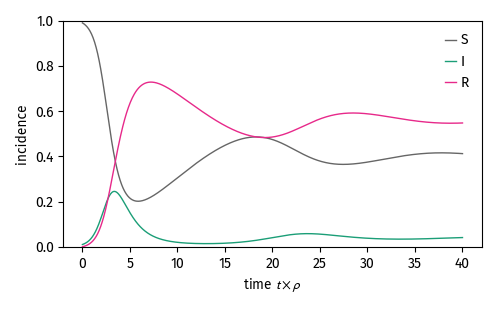

In [11]:
import matplotlib.pyplot as pl
pl.figure()
for compartment, timeseries in result.items():
    pl.plot(t, timeseries, label=compartment)
pl.xlabel(r"time $t\times\rho$")
pl.ylabel("incidence")
pl.ylim([0,1])
pl.legend()
pl.gcf().tight_layout()

In [13]:
import networkx as nx

k0 = 50
eta = R0 * rho / k0
N = int(1e4)
edges = [ (e[0], e[1], 1.0) for e in nx.fast_gnp_random_graph(N,k0/(N-1)).edges() ]

SIRS = StochasticEpiModel([S,I,R],N,edge_weight_tuples=edges)

SIRS.set_link_transmission_processes([
    #### transmission process ####
    # I + S (eta)-> I + I
    (I, S, eta, I, I),
])
    
SIRS.set_node_transition_processes([
    #### transition processes ####
    # I (rho)-> R
    # R (omega)-> S
    (I, rho, R),
    (R, omega, S),

])

SIRS.set_random_initial_conditions({S:N-int(1e-2*N), I:int(1e-2*N)})

In [14]:
t_s, result_s = SIRS.simulate(40)

<IPython.core.display.Javascript object>


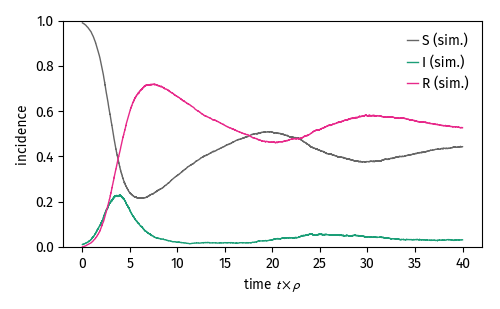

In [16]:
pl.figure()

for compartment, timeseries in result.items():
    #pl.plot(t, timeseries, label=compartment)
    pl.plot(t_s, result_s[compartment]/N, label=compartment+" (sim.)")
pl.xlabel(r"time $t\times\rho$")
pl.ylabel("incidence")
pl.ylim([0,1])
pl.legend()
pl.gcf().tight_layout()
pl.show()